# Angular velocity in 3D movements

> Renato Naville Watanabe  
> Laboratory of Biomechanics and Motor Control ([http://pesquisa.ufabc.edu.br/bmclab](http://pesquisa.ufabc.edu.br/bmclab))  
> Federal University of ABC, Brazil

An usual problem found in Biomechanics (and Mechanics in general) is to find the angular velocity of an object. We consider that a basis $\hat{e_1}$, $\hat{e_2}$ and $\hat{e_3}$ is attached to the body and is known. To learn how to find a basis of a frame of reference, see [this notebook](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/ReferenceFrame.ipynb).

<figure><img src="../images/3DbodyrefMove.png\" width=800 />

## Axis of rotation

As in the planar movement, the angular velocity is a vector perpendicular to the rotation. The line in the direction of the angular velocity vector is known as the axis of rotation. 

The rotation beween two frames of reference is characterized by the rotation matrix $R$ obtained by stacking the versors $\hat{\boldsymbol e_1}$, $\hat{\boldsymbol e_2}$ and $\hat{\boldsymbol e_3}$ in each column of the matrix (for a revision on rotation matrices see [this](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation2D.ipynb) and [this](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation3D.ipynb) notebooks). 

A vector in the direction of the axis of rotation is a vector that does not changes the position after the rotation. That is:

\begin{equation}
v = Rv
\end{equation}


This vector is the eigenvector of the rotation matrix $R$ with eigenvalue equal to one.  

Below the yellow arrow indicates the axis of rotation of the rotation between the position of the reference frame  $\hat{\boldsymbol i}$, $\hat{\boldsymbol j}$ and $\hat{\boldsymbol k}$ and the reference frame of $\hat{\boldsymbol e_1}$, $\hat{\boldsymbol e_2}$ and $\hat{\boldsymbol e_3}$.

<IPython.core.display.Javascript object>


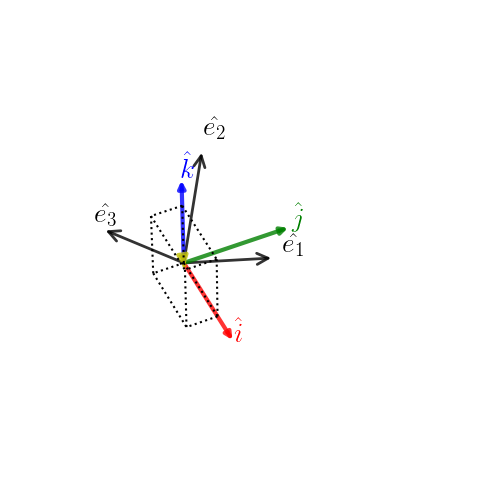

In [71]:
from IPython.core.display import Math, display
import sympy as sym
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
%matplotlib notebook
from CCSbasis import CCSbasis


a, b, g = sym.symbols('alpha, beta, gamma')

# Elemental rotation matrices of xyz in relation to XYZ:
RX = sym.Matrix([[1, 0, 0], [0, sym.cos(a), -sym.sin(a)], [0, sym.sin(a), sym.cos(a)]])
RY = sym.Matrix([[sym.cos(b), 0, sym.sin(b)], [0, 1, 0], [-sym.sin(b), 0, sym.cos(b)]])
RZ = sym.Matrix([[sym.cos(g), -sym.sin(g), 0], [sym.sin(g), sym.cos(g), 0], [0, 0, 1]])

# Rotation matrix of xyz in relation to XYZ:
R = RX@RZ
R = sym.lambdify((a, b, g), R, 'numpy')

alpha = np.pi/4
beta = np.pi/4
gamma = np.pi/4

R = R(alpha, beta, gamma)

e1 = np.array([[1,0,0]])
e2 = np.array([[0,1,0]])
e3 = np.array([[0,0,1]])

basis = np.vstack((e1,e2,e3))
basisRot = R@basis
lv, v = np.linalg.eig(R)

axisOfRotation = [np.real(np.squeeze(v[:,np.abs(lv-1)<1e-6]))]


CCSbasis(Oijk=np.array([0,0,0]), Oxyz=np.array([0,0,0]), ijk=basis.T, xyz=basisRot.T, 
         vector=True, point = axisOfRotation)


## Computing the angular velocity

The angular velocity $\vec{\boldsymbol\omega}$ is in the direction of the axis of rotation (hence it is parallel to the axis of rotation) and can be described in the basis fixed in the body:

\begin{equation}
    \vec{\boldsymbol{\omega}} = \omega_1\hat{\boldsymbol{e_1}} + \omega_2\hat{\boldsymbol{e_2}} + \omega_3\hat{\boldsymbol{e_3}}  
\end{equation}

So, we must find $\omega_1$, $\omega_2$ and $\omega_3$.

First we will express the angular velocity $\vec{\boldsymbol{\omega}}$ in  terms of these derivatives. 

Remember that the angular velocity is described as a vector in the orthogonal plane of the rotation. ($\vec{\boldsymbol{\omega_1}} = \frac{d\theta_1}{dt}\hat{\boldsymbol{e_1}}$, $\vec{\boldsymbol{\omega_2}} = \frac{d\theta_2}{dt}\hat{\boldsymbol{e_2}}$ and $\vec{\boldsymbol{\omega_3}} = \frac{d\theta_3}{dt}\hat{\boldsymbol{e_3}}$). 

Note also that the derivative of the angle $\theta_1$ can be described as the projection of the vector $\frac{d\hat{\boldsymbol{e_2}}}{dt}$ on the vector $\hat{\boldsymbol{e_3}}$. 

This can be written by using the scalar product between these vectors: $ \frac{d\theta_1}{dt} = \frac{d\hat{\boldsymbol{e_2}}}{dt}\cdot \hat{\boldsymbol{e_3}}$. Similarly, the same is valid for the angles in the other two directions: $ \frac{d\theta_2}{dt} = \frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot \hat{\boldsymbol{e_1}}$ and $ \frac{d\theta_3}{dt} = \frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}$.

<figure><img src="../images/derivVersor.png\" width=400 />
    
    
So, we can write the angular velocity as:

\begin{equation}
    \vec{\boldsymbol{\omega}} =  \left(\frac{d\hat{\boldsymbol{e_2}}}{dt}\cdot \hat{\boldsymbol{e_3}}\right) \hat{\boldsymbol{e_1}} + \left(\frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot \hat{\boldsymbol{e_1}}\right) \hat{\boldsymbol{e_2}} + \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}\right) \hat{\boldsymbol{e_3}}
    \label{eq:angvel}
\end{equation}

## The derivative of the versors

Now, we must isolate the derivative of the versors to substitute them in the Eq. \eqref{eq:derivangmom}. To isolate the derivative of the versor $\hat{\boldsymbol{e_1}}$, first we cross multiply both sides of the equation above by $\hat{\boldsymbol{e_1}}$:

\begin{equation}
    \vec{\boldsymbol{\omega}} \times \hat{\boldsymbol{e_1}} = - \left(\frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot \hat{\boldsymbol{e_1}}\right) \hat{\boldsymbol{e_3}} + \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}\right) \hat{\boldsymbol{e_2}}
\end{equation}

If we note that the term multipliying $\hat{\boldsymbol{e_3}}$ in the right side of the identity can be obtained by $\frac{d\hat{\boldsymbol{e_1}}\cdot\hat{\boldsymbol{e_3}} }{dt} = \frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot\hat{\boldsymbol{e_3}} + \frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot\hat{\boldsymbol{e_1}} \rightarrow 0 = \frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot\hat{\boldsymbol{e_3}} + \frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot\hat{\boldsymbol{e_1}} \rightarrow \frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot\hat{\boldsymbol{e_1}}  = - \frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot\hat{\boldsymbol{e_3}} $ (the scalar product $\hat{\boldsymbol{e_1}}\cdot\hat{\boldsymbol{e_3}}$ is zero because these vectors are orthogonal ), we can write the equation above becomes:

\begin{equation}
    \vec{\boldsymbol{\omega}} \times \hat{\boldsymbol{e_1}} = \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_3}}\right) \hat{\boldsymbol{e_3}} + \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}\right) \hat{\boldsymbol{e_2}}
\end{equation}

Finally, we can note that $\frac{d\hat{\boldsymbol{e_1}}\cdot\hat{\boldsymbol{e_1}} }{dt} = \frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot\hat{\boldsymbol{e_1}} + \frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot\hat{\boldsymbol{e_1}} \rightarrow \frac{d(1)}{dt} = 2\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot\hat{\boldsymbol{e_1}} \rightarrow \frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot\hat{\boldsymbol{e_1}}  = 0 $. As this term is equal to zero, we can add it to the expression above:

\begin{equation}
    \vec{\boldsymbol{\omega}} \times \hat{\boldsymbol{e_1}} = \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot\hat{\boldsymbol{e_1}}\right)\hat{\boldsymbol{e_1}} +  \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_3}}\right) \hat{\boldsymbol{e_3}} + \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}\right) \hat{\boldsymbol{e_2}} 
\end{equation}

Note that the expression above is just another manner to write the vector $\frac{d\hat{\boldsymbol{e_1}}}{dt}$, as any vector can be described by the sum of the projections on each of the versors forming a basis.

So, the derivative of the versor $\hat{\boldsymbol{e_1}}$  can be written as:

\begin{equation}
    \frac{d\hat{\boldsymbol{e_1}}}{dt} = \vec{\boldsymbol{\omega}} \times \hat{\boldsymbol{e_1}}
\end{equation}

Similarly, the derivatives of the versors $\hat{\boldsymbol{e_2}}$ and $\hat{\boldsymbol{e_3}}$ can be written as:

\begin{equation}
    \frac{d\hat{\boldsymbol{e_2}}}{dt} = \vec{\boldsymbol{\omega}} \times \hat{\boldsymbol{e_2}} ~~~~~~~~\text{and} ~~~~~~ \frac{d\hat{\boldsymbol{e_3}}}{dt} = \vec{\boldsymbol{\omega}} \times \hat{\boldsymbol{e_3}}
\end{equation}

\begin{equation}
    \vec{\boldsymbol{\omega}} =  \left(\frac{d\hat{\boldsymbol{e_2}}}{dt}\cdot \hat{\boldsymbol{e_3}}\right) \hat{\boldsymbol{e_1}} + \left(\frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot \hat{\boldsymbol{e_1}}\right) \hat{\boldsymbol{e_2}} + \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}\right) \hat{\boldsymbol{e_3}}
    \label{eq:angvel}
\end{equation}

Note that the angular velocity $\vec{\boldsymbol\omega}$ is expressed in the reference frame of the object. If you want it described as a linear combination of the versors of the global basis $\hat{\boldsymbol{i}}$, $\hat{\boldsymbol{j}}$ and $\hat{\boldsymbol{k}}$, just multiply the the vector $\vec{\boldsymbol\omega}$ by the rotation matrix formed by stacking each versor in a matrix column (for a revision on rotation matrices see [this](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation2D.ipynb) and [this](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation3D.ipynb) notebooks).

### 1 ) 3D pendulum bar

At the file '../data/3Dpendulum.txt' there are 3 seconds of data of 3 points of a three-dimensional cylindrical pendulum. It can move in every direction and has a motor at the upper part of the cylindrical bar producing torques to move the bar. 
 
The point m1 is at the upper part of the cylinder and is the origin of the system. 
 
The point m2 is at the center of mass of the cylinder. 
 
The point m3 is a point at the surface of the cylinder. 

Below we compute its angular velocity.

First we load the file.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)
%matplotlib notebook
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

data = np.loadtxt('../data/3dPendulum.txt', skiprows=1, delimiter = ',')

And separate each mark in a variable.

In [10]:
t = data[:,0]
m1 = data[:,1:4]
m2 = data[:,4:7]
m3 = data[:,7:]
dt = t[1]

Now, we form the basis $\hat{\boldsymbol e_1}$, $\hat{\boldsymbol e_2}$ and $\hat{\boldsymbol e_3}$.

In [11]:
V1 = m2 - m1
e1 = V1/np.linalg.norm(V1,axis=1,keepdims=True)

V2 = m3-m2

V3 = np.cross(V2,V1)
e2 = V3/np.linalg.norm(V3,axis=1,keepdims=True)

e3 = np.cross(e1,e2)

Below, we compute the derivative of each of the versors.

In [12]:
de1dt = np.diff(e1, axis=0)/dt
de2dt = np.diff(e2, axis=0)/dt
de3dt = np.diff(e3, axis=0)/dt

Here we compute each of the components $\omega_1$, $\omega_2$ and $\omega_3$ of the angular velocity $\vec{\boldsymbol \omega}$ by using the scalar product.

In [13]:
omega1 = np.sum(de2dt*e3[0:-1,:], axis = 1).reshape(-1,1)
omega2 = np.sum(de3dt*e1[0:-1,:], axis = 1).reshape(-1,1)
omega3 = np.sum(de1dt*e2[0:-1,:], axis = 1).reshape(-1,1)

Finally, the angular velocity vector $\vec{\boldsymbol \omega}$ is formed by stacking the three components together.

In [14]:
omega = np.hstack((omega1, omega2, omega3))

## References


- Kane T, Levinson D (1985) [Dynamics: Theory and Applications](https://ecommons.cornell.edu/handle/1813/638). McGraw-Hill, Inc
